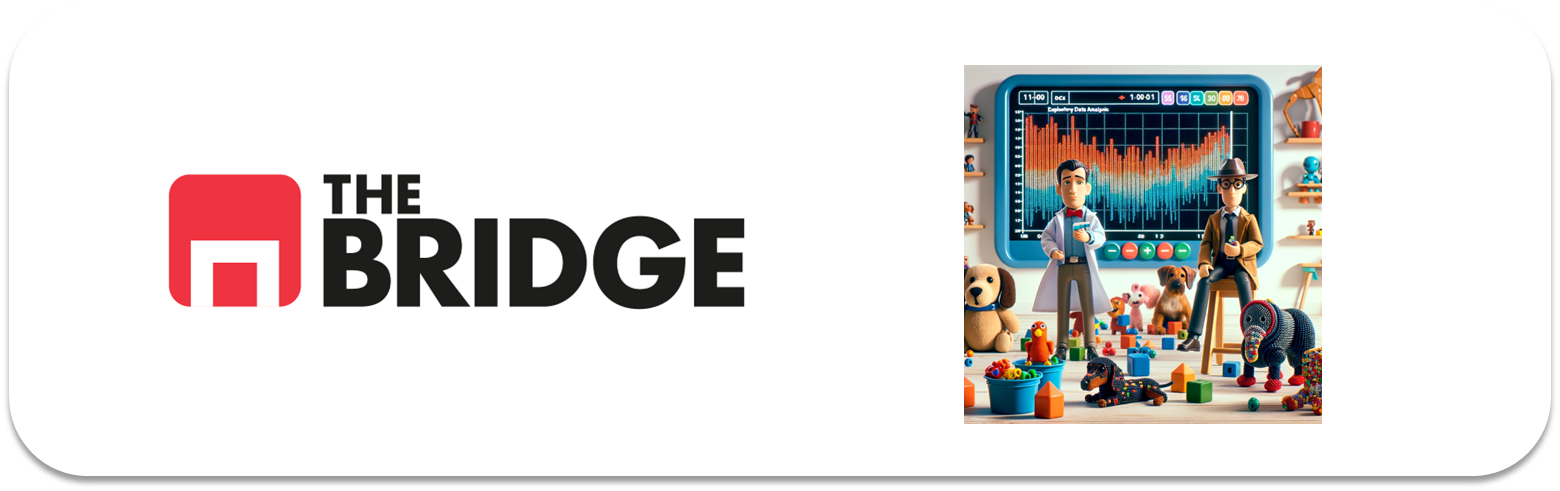

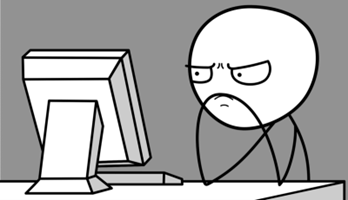

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, bubble_plot
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [3]:
df_admision = pd.read_csv("./data/admission_data.csv")

In [4]:
df_admision

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected
...,...,...,...,...,...
12758,12758,1973,Other,M,Accepted
12759,12759,1973,Department of Mechanical Engineering,M,Accepted
12760,12760,1973,Other,F,Rejected
12761,12761,1973,Other,M,Rejected


In [5]:
df_admision.drop(["Unnamed: 0","Year"], axis = 1, inplace = True)

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

*Tendremos que comprobar cuales son los ratios de admisión en cada departamento específico según el género y después comprobar esos ratios con el global. Es decir para cada combinación de departamento con genero, ver el porcentaje de peticiones admitidas y rechazadas y compararlas por género y luego con el total*

1. *Variables que necesito analizar, las tres que tengo: Major, Admission, Gender*
2. *Vairable directora, podría pensar en admisiones pero como quiero ver la comparativa de género para ver la discrimianción posible, será mejor usar esta como directora: Gender*
3. *Tipo de análisis: multivariante con todas categórias*

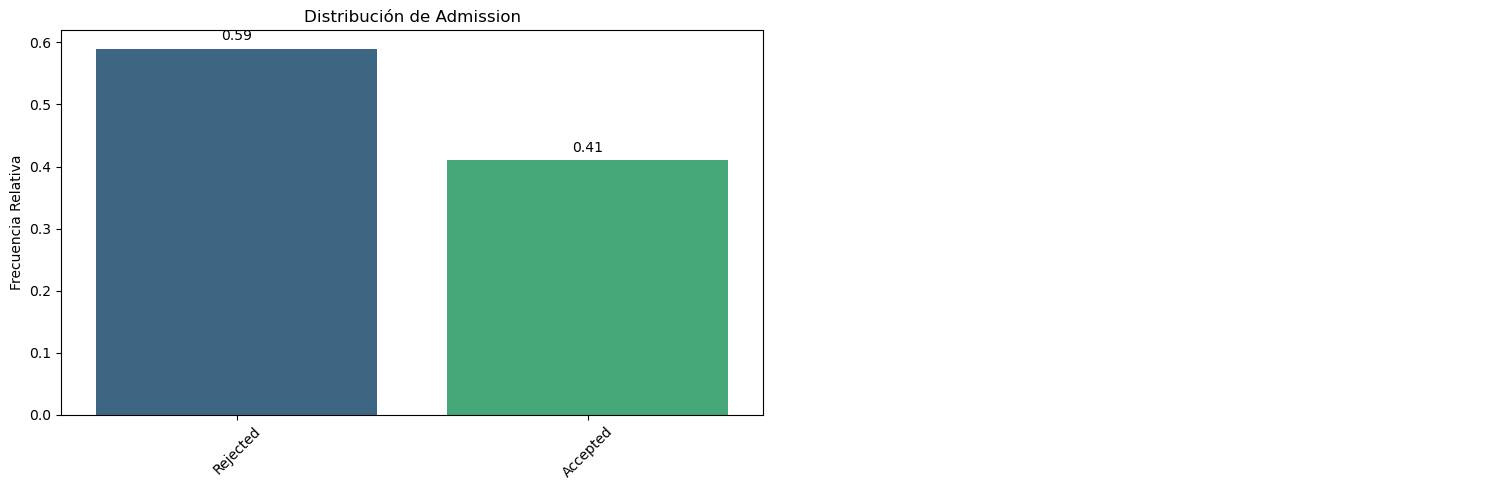

In [6]:
pinta_distribucion_categoricas(df_admision,["Admission"], relativa= True, mostrar_valores= True)

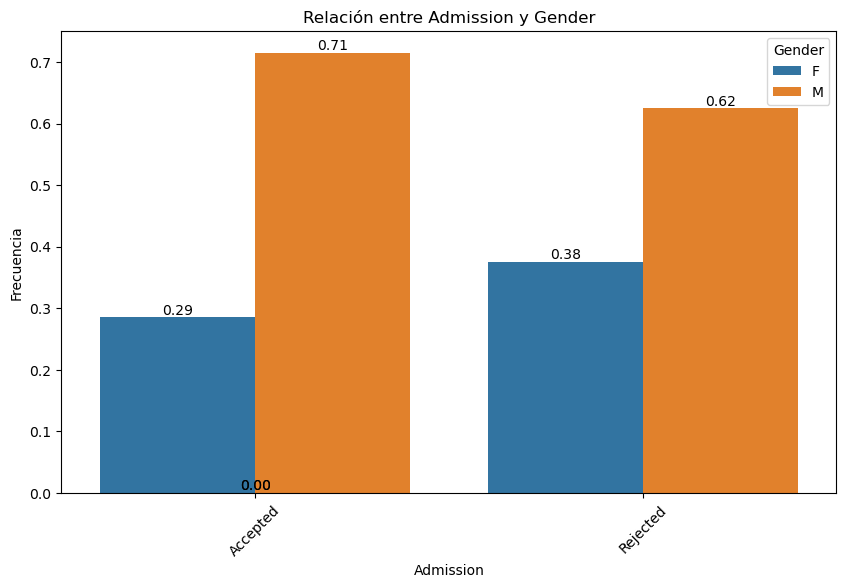

In [7]:
plot_categorical_relationship_fin(df_admision,"Admission","Gender", relative_freq= True, show_values= True)

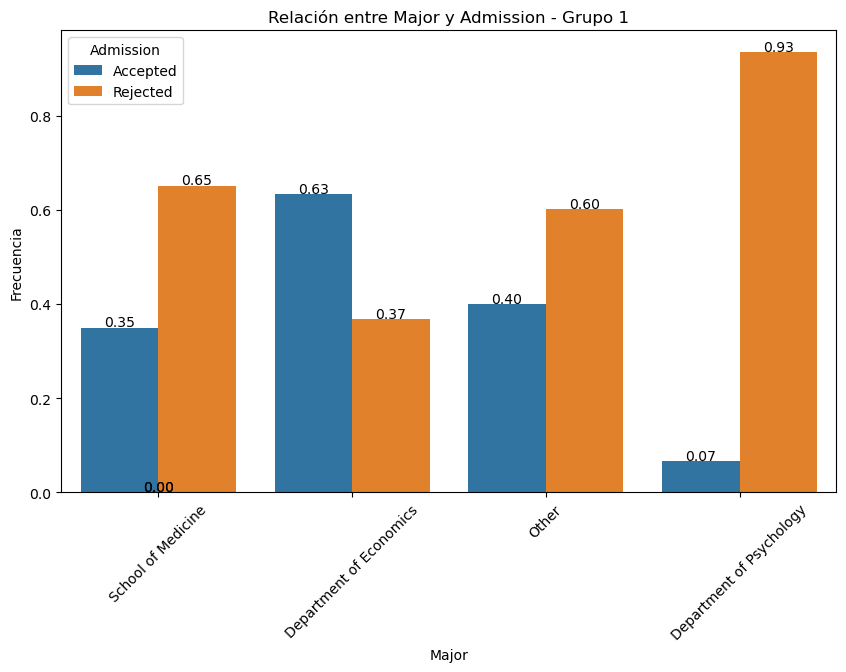

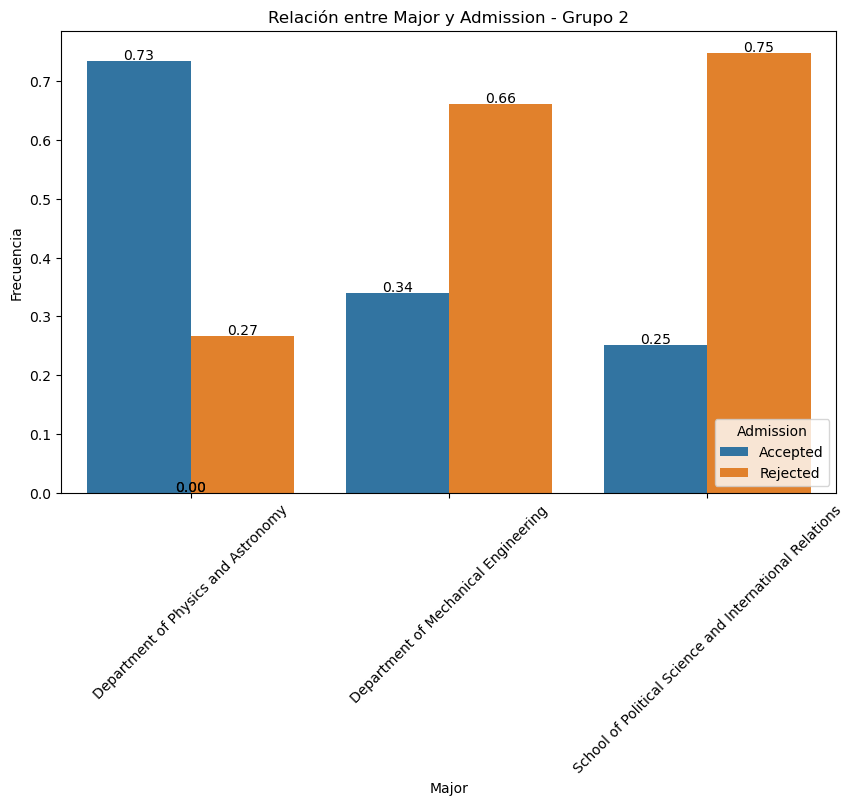

In [8]:
plot_categorical_relationship_fin(df_admision,"Major","Admission", relative_freq= True, show_values= True, size_group=4)

**#Divido mi dataset en tantos subdatasets (dataframes) como valores de mi categórica directora** y me quedo solo con las columnas de las otras dos variables

In [9]:
columnas = ["Gender","Admission","Major"] 
col_directora = "Gender"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admision[col_directora].unique():
    diccionario_multivariante[valor] = df_admision.loc[df_admision[col_directora] == valor,[col_2,col_1]] 

In [12]:
print(diccionario_multivariante)

{'F':                                       Major Admission
0                        School of Medicine  Rejected
2                                     Other  Accepted
6                  Department of Psychology  Accepted
10                                    Other  Rejected
15                                    Other  Rejected
...                                     ...       ...
12744  Department of Mechanical Engineering  Accepted
12749                                 Other  Rejected
12755                                 Other  Rejected
12757                                 Other  Rejected
12760                                 Other  Rejected

[4321 rows x 2 columns], 'M':                                       Major Admission
1                   Department of Economics  Accepted
3                                     Other  Accepted
4                                     Other  Rejected
5                                     Other  Rejected
7                                     Other  

#Hago un análsis bivariante para cada subdataset y comparo todo

Respuesta F:


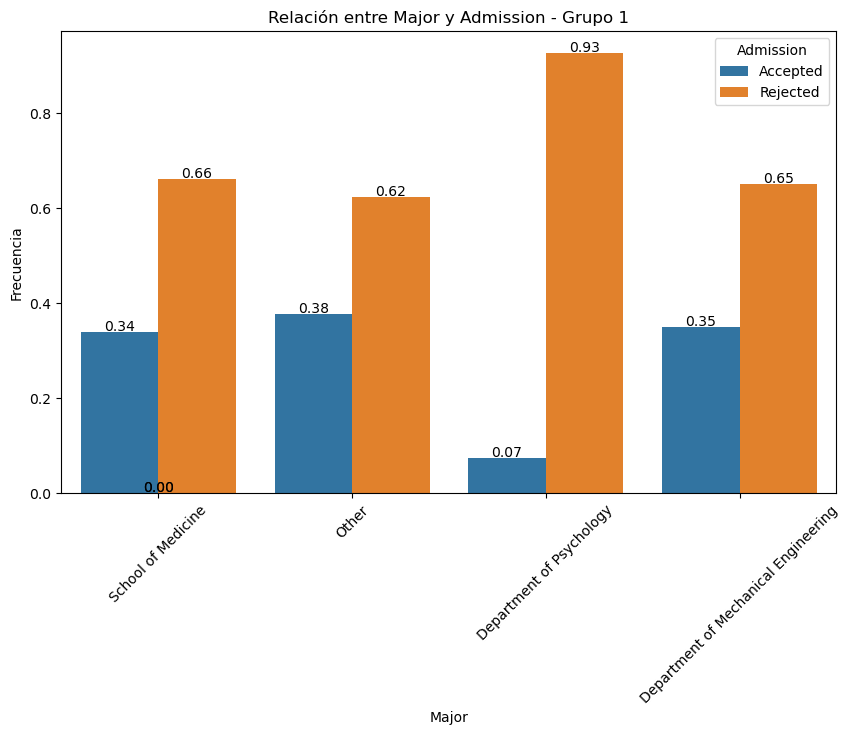

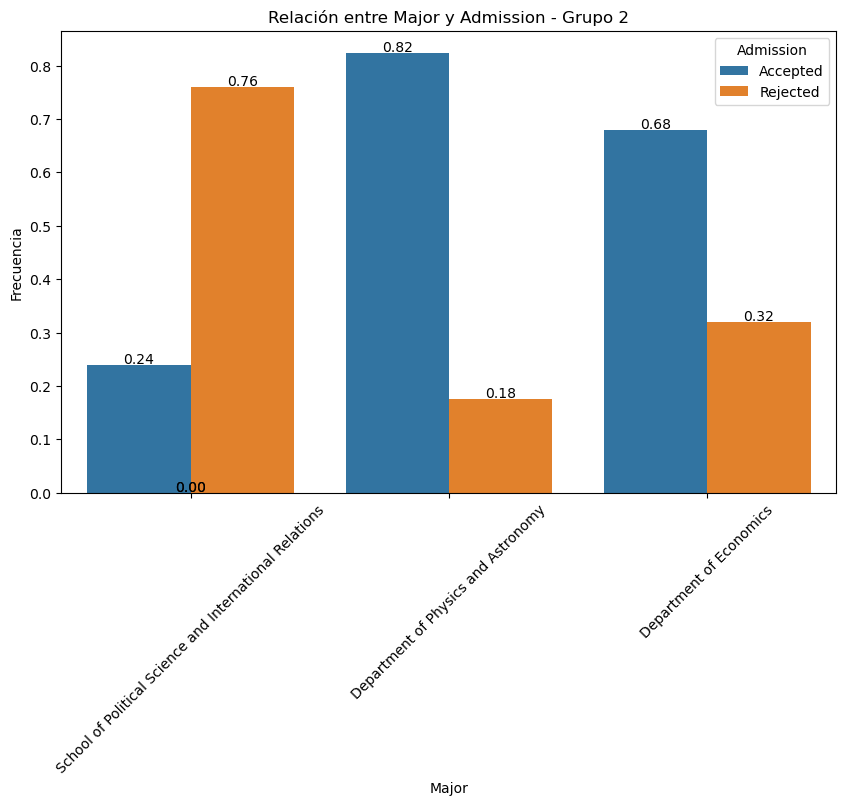

Respuesta M:


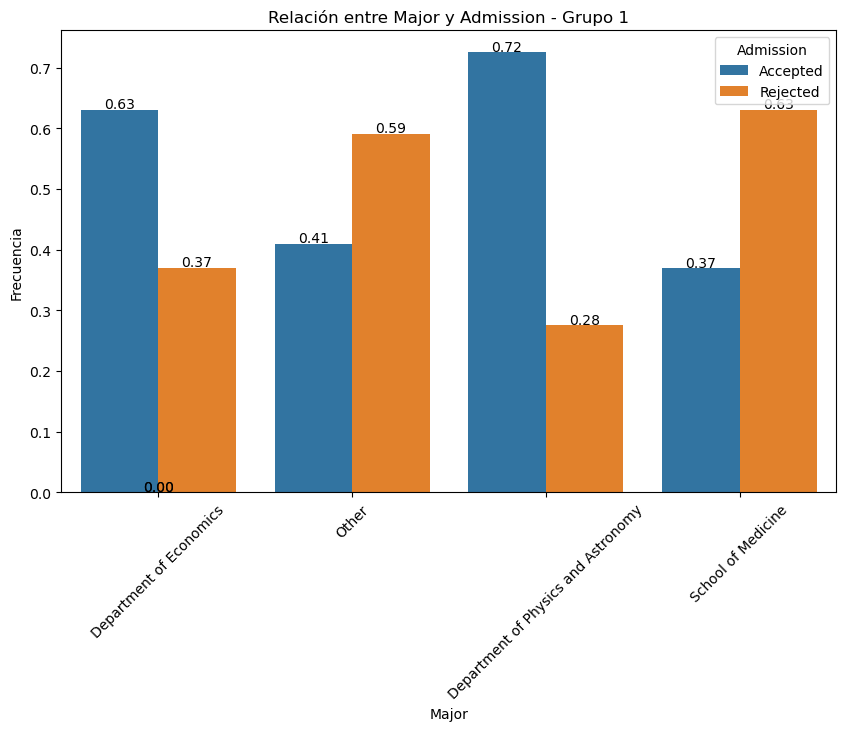

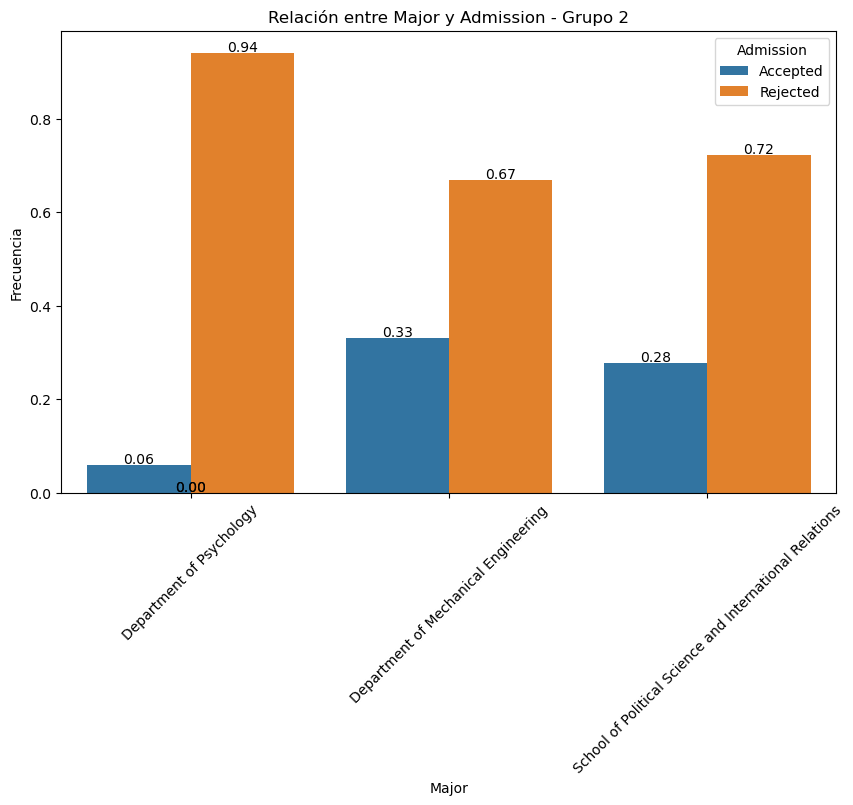

In [10]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group= 4)

*Departamento a departamento*:

- **Medicina**: Distribución para mujeres (34%-66%) y para hombres (37%-63%). La diferencia, que existe no parece tan significativa y sí que es diferente respecto a las admisiones en general (tanto para hombres como para mujeres) y es muy similar a la tasa general del departamento (35% admitidos, 65% rechazados) [veáse el análisis comparativo de admisiones-departamentos, "Admission"-"Majo"]

- **Psicología**: Aquí las distribuciones entre hombres y mujeres son todavía más parecidas (6% de admitidos de los candidatos hombres, 7% de las admitidas candidatas mujer) y  muy parecida a la distribución global del departamento. Tampoco diría que hay discriminación.

- **Mecánica e Ingeniería**: De nuevo las distribuciones no se diferencian excesivamente Mujeres (ratio de admisión: 35%) y en hombres (33%) y ambos del ratio de admisión del departamento (34%). De nuevo, no hay razón para pensar en discriminación.

- **Política**: Aquí hay un poco más de diferencia, un ratio del 28% de admitidos de las candidaturas presentadas por hombres y un 24% de las mujeres. Comparado con el ratio del departamento: 25%. Podríamos aquí quizás intentar estudiarlo más a fondo, introducir algún test (aunque estos datos son población y no muestra)... Este lo dejamos en borroso, pero desde mi punto de vista no es concluyente, y menos si comparamos los 18 puntos porcentuales de diferencia considerando sólo "Admissions" y "Gender" (bivariante de ambos)

- **Física**: Aquí hay una diferencia notable a favor... de las mujeres (82% de admitidas) frente a los hombres (72% de admitidos). Aquí podríamos decir que sí hay discriminación pero en favor de las mujeres, frente a un 73% que es el ratio de admisiones del departamento (y que está claramente influido por el mayor número de peticiones masculinas).

- **Economía**: Otro caso "borroso", aunque menos, en el que podríamos pensar en discriminación al tener un ratio para mujeres del 68% y u ratio del 63% para hombres. Si hay discrimanción es en favor de las mujeres.

* *Considerando los departamentos especificados podríamos decir que hay discriminación en favor de las mujeres claramente en Física y discrimiación no tan clara en Física a favor de las mujeres y en Política a favor de los hombres*

* *Estos resultados contrastan con el global donde se ve una claro sesgo en favor de las aplicaciones másculinas. Si solo hubieramos hecho el análisis de los departamentos la Universidad se habría llevado a engaño fruto de lo que se conoce como **Paradoja de Simpson**, que básicamente consiste en lo que estás viendo: "los árboles no te dejan ver el bosque", si no analizamos todo el conjunto nos estamos perdiendo conclusiones o equivocándonos en ellas por guiarnos por un estudio parcial. Al considerar la gran mayoria de aplicaciones (en "Others") el peso de la discriminación (entendiendo esta por la diferencia significativa en los ratios de admisión) cambia completamente y la Universidad se vería obligada a analizar mejor ese "Others" (lo que quiera hacer con los departamentos específicos ya es cosa suya pero también le habríamos dado el dato)*


### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [14]:
df_tips = pd.read_csv("./data/tips.csv")

In [15]:
df_tips.drop("Unnamed: 0", axis = 1, inplace = True)

In [16]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [17]:
df_cars = pd.read_csv("./data/car_crashes.csv", sep = "|")

In [18]:
df_cars.drop("Unnamed: 0", axis = 1, inplace = True)

In [19]:
df_cars.rename(columns={"abbrev":"state"}, inplace = True)
df_cars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [20]:
# Numéricamente
corr_matrix = df_cars[df_cars.columns.to_list()[:-1]].corr() # Me quito la última columna que es la de Estado que es la única no numérica
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


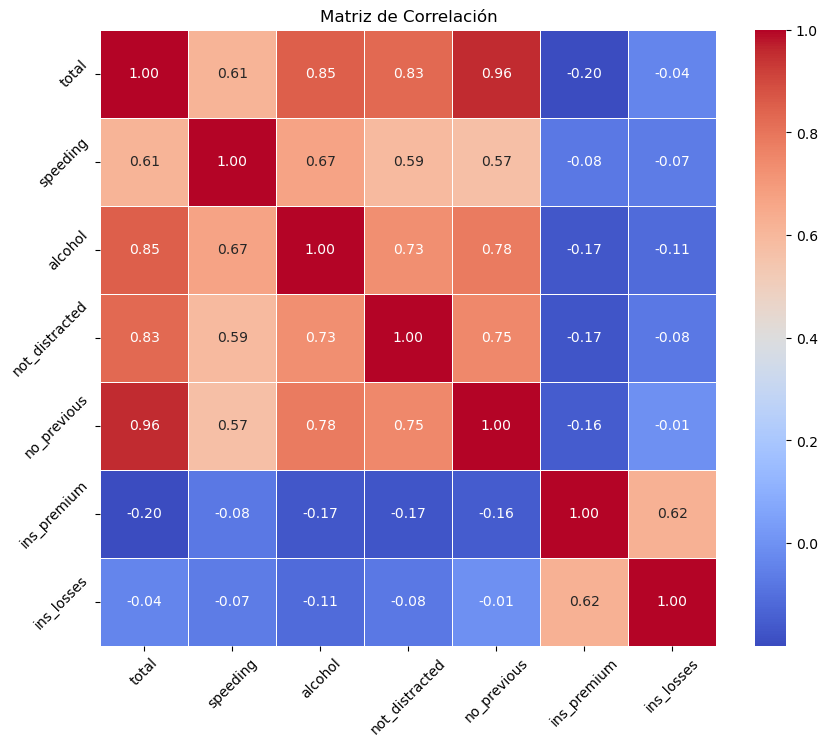

In [21]:
# Heatmap
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

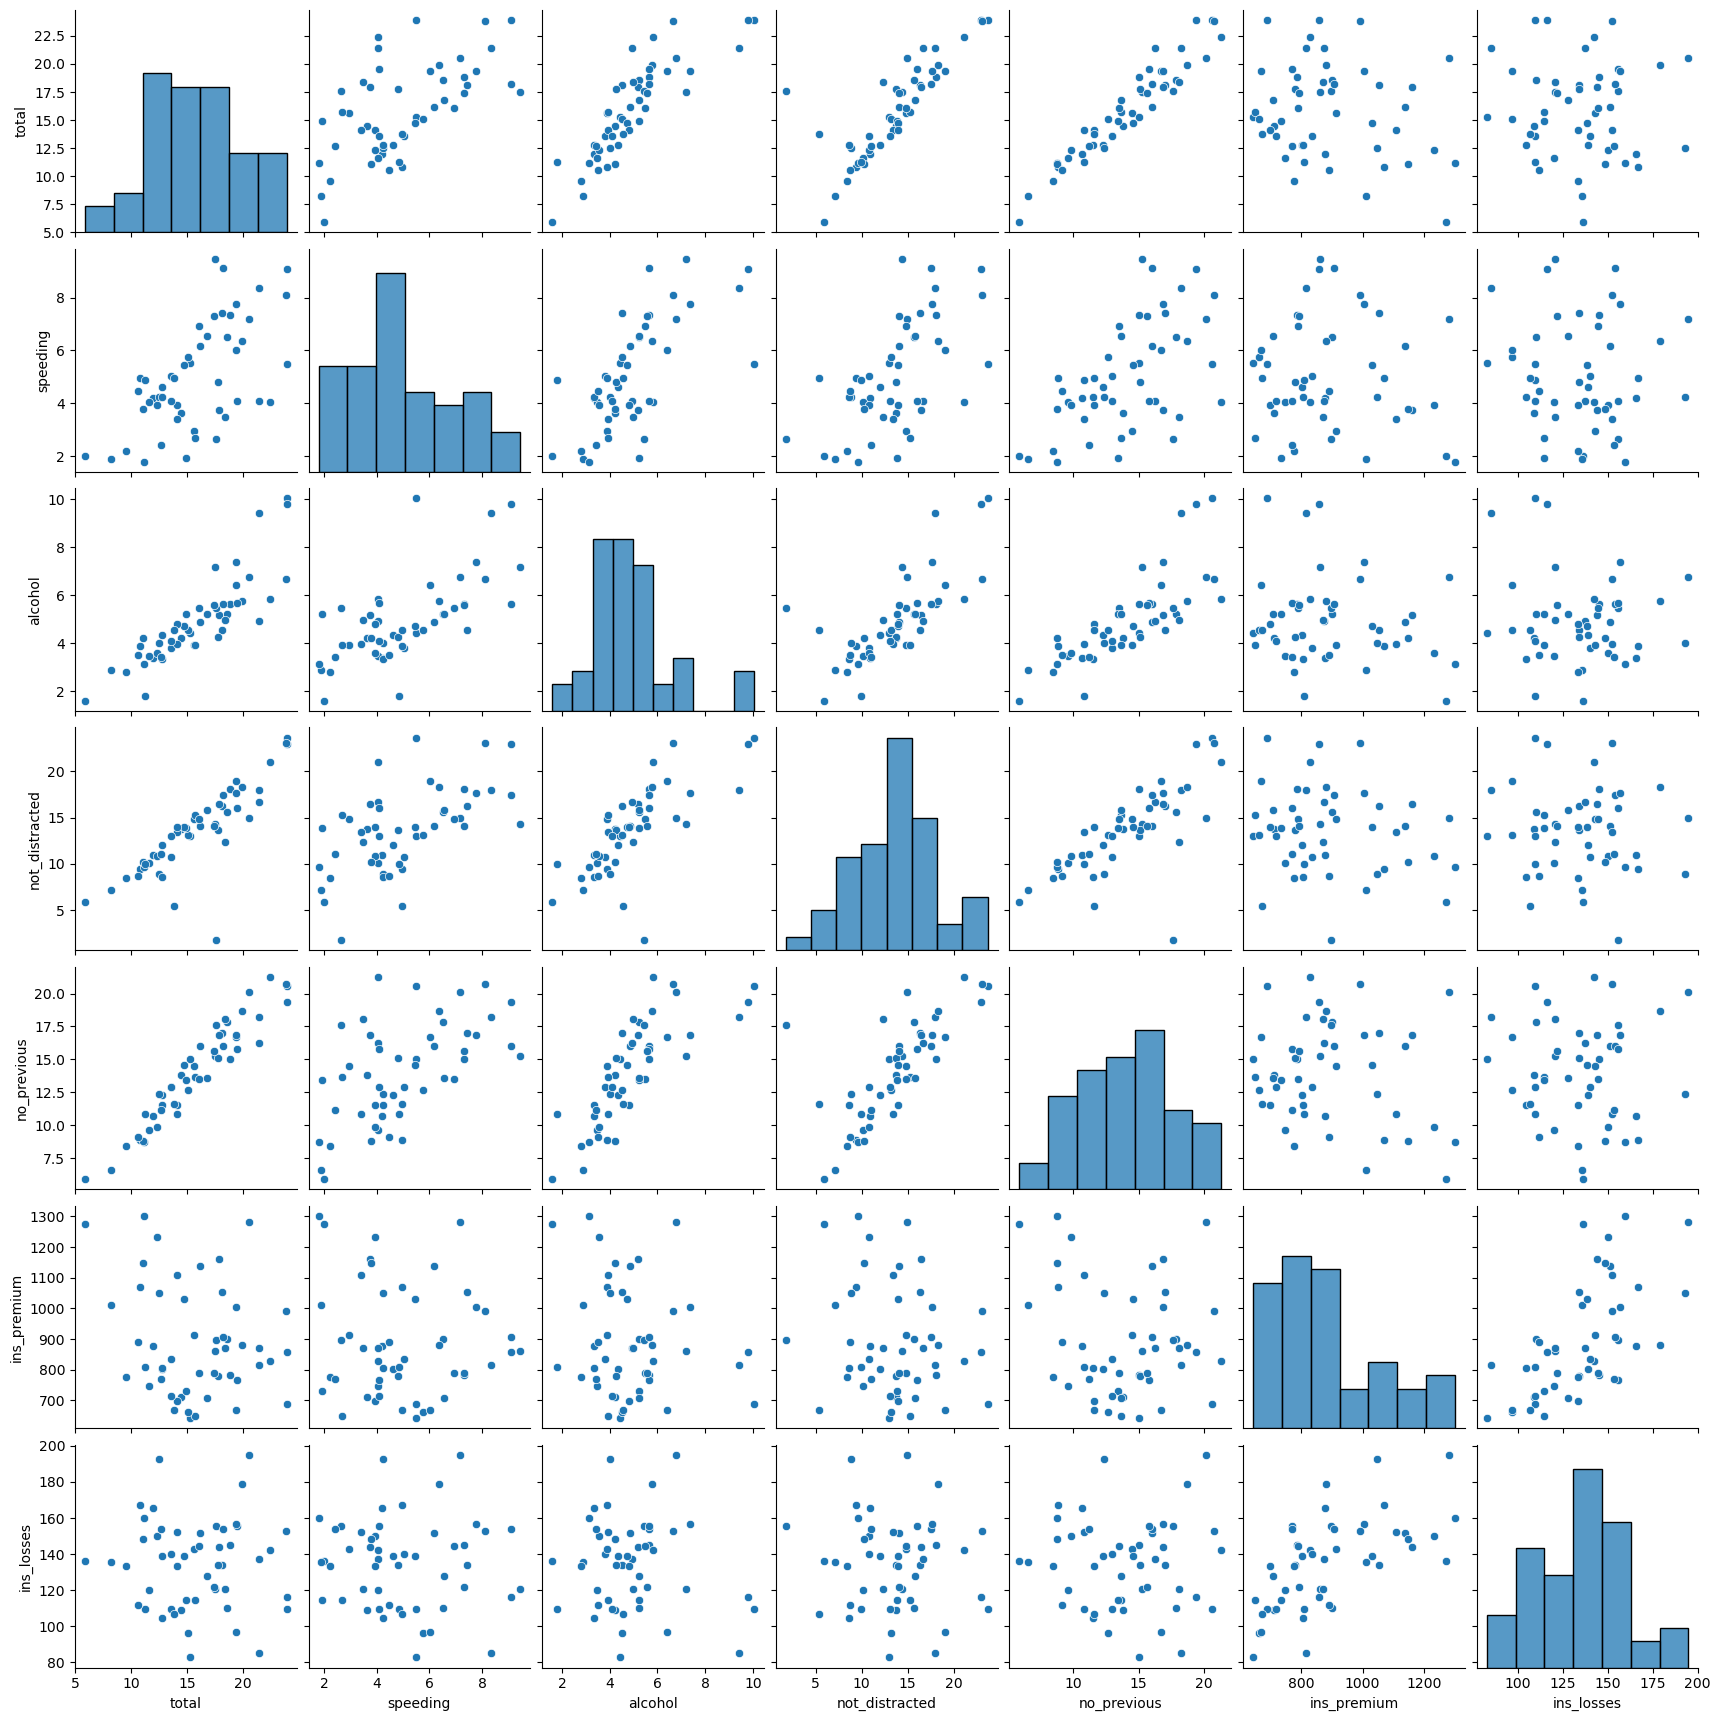

In [22]:
# Pairplot

sns.pairplot(df_cars[df_cars.columns.to_list()[:-1]])
plt.show()

*Tal y como nos muestran repetidamente los tres tipos de análisis el numero de accidentes correla con los factores de "speeding", sobre todo con "alcohol" y con no tener accidentes antes. Teniendo en cuenta que son accidentes mortales, parece que la historia a contar es la de accidentes con un importante peso en el alcohol en todos los estados. Estas graficas recordemos que están comparando estados entre sí (cada punto representa el valor de un estado).  
Por tanto, no es que a medida que sube el consumo de alochol aumentan los accidentes, no lo que quiere decir es que hay una relación muy similar entre factores (speedin, alcohol) y accidentes en casi todos los estados. Y que en general el los accidentes, independientemente del estado son de personas que no había tenido antes un accidente reportado a la compañía de seguros, se sobreentiende pero habría que aclarar*

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

(3, 2)


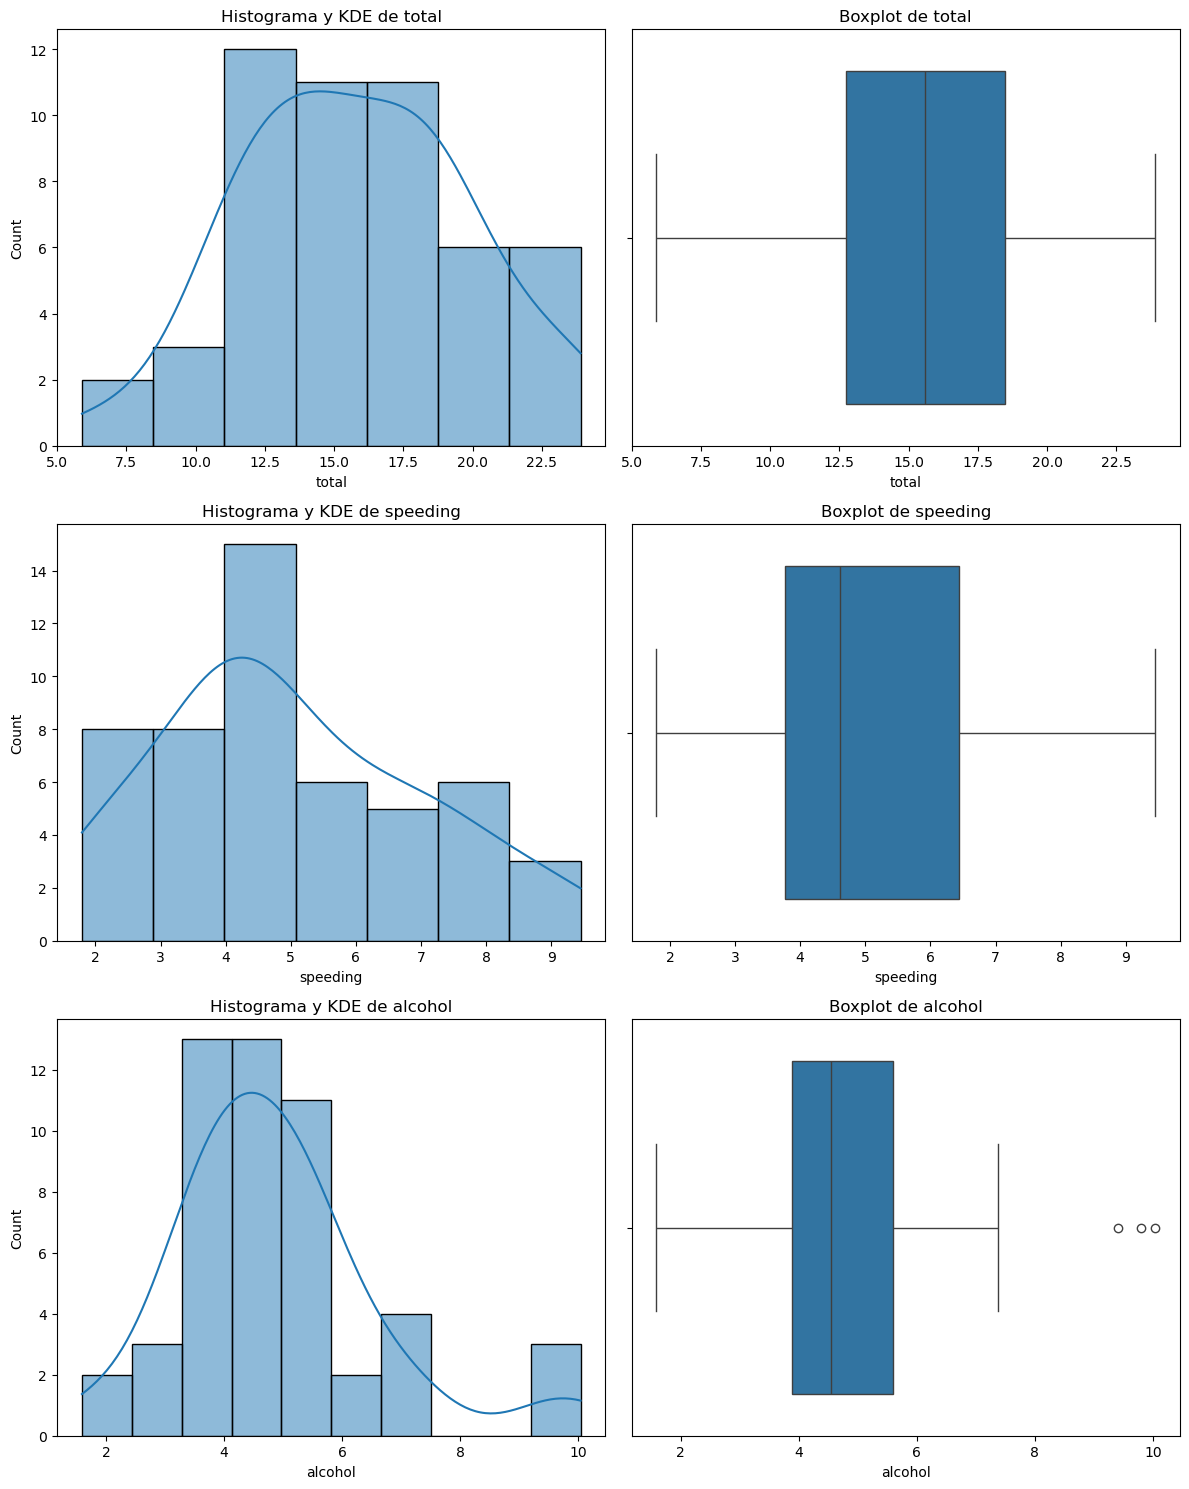

In [24]:
# Primero valores para cada una

plot_combined_graphs(df_cars,["total","speeding","alcohol"])

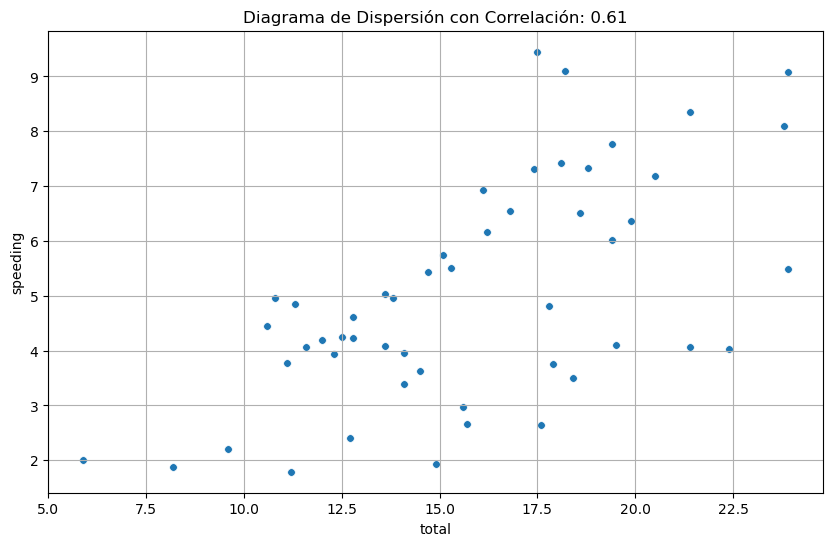

In [25]:
# Luego bivariantes
grafico_dispersion_con_correlacion(df_cars, "total","speeding", mostrar_correlacion= True, tamano_puntos= 30)

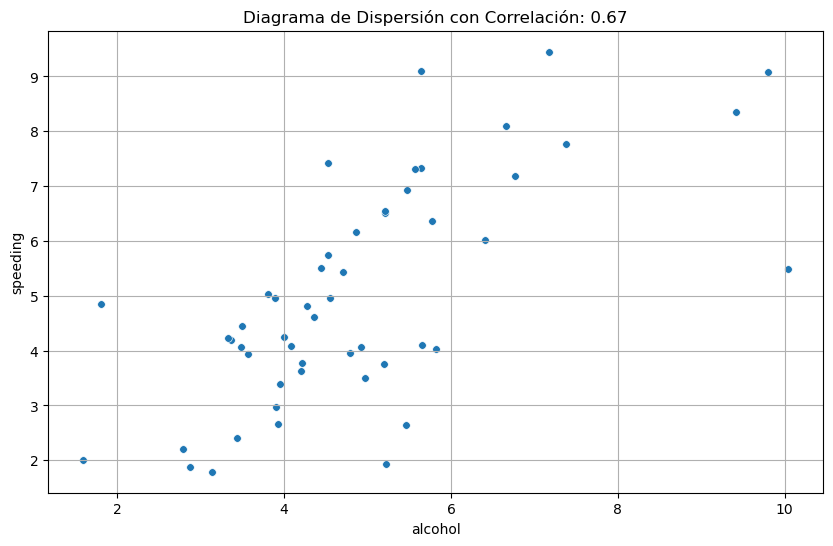

In [26]:
grafico_dispersion_con_correlacion(df_cars, "alcohol","speeding", mostrar_correlacion= True, tamano_puntos= 30)

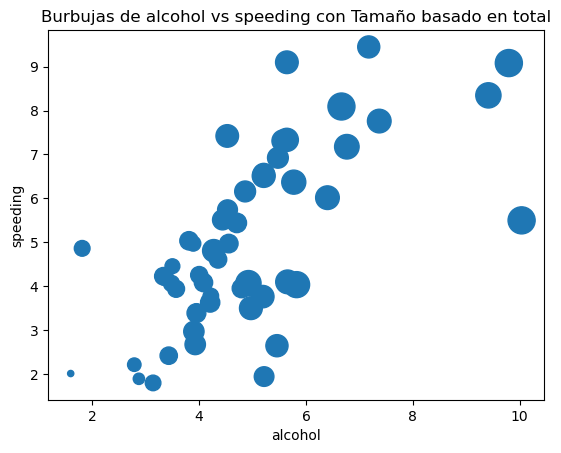

In [27]:
# Ahora el gráfico de burbujas
bubble_plot(df_cars,"alcohol","speeding","total", scale= 0.05) # Meto la escala para que las burbujas se vean claras

* *Como era de esperar si aumentan los accidentes (sean con factor alcohol o con factor speeding, las burbujas se hacen más grandes, comparense ls burbujas de la esquina superior derecha con las de la esquina inferior derecha) pero esto entra dentro de la lógica de los datos*
* *Lo interesante está en el tamaño de las burbujas con valores de alcohol intermedios y bajos de speeding, ya que esto se sale un poco de la norma, averiguar que estados son esos en los que el acohol y el speeding no tienen la misma influencia que en las burbujas del cuadrante superior, porque en estos quizás las medidas para reducir los accidentes mortales serán casi con seguridad diferentes. Aquí estaría parte de mi historia, aquí y por supuesto en la parte del alcohol, pero esta es una historia "conocida".*


![image.png](attachment:image.png)